In [1]:
## Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("seaborn-pastel")

# Plotting geographical data
import folium
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
remove_col = []
for colname,col_serie in data.iteritems():
    if len(col_serie.unique())== 1:
        remove_col.append(colname)
        
data.drop(columns=remove_col,inplace=True)
print("Removed columns: {}\n".format(", ".join(remove_col)))
print("Final columns: {}".format(", ".join(data.columns)))

Removed columns: 

Final columns: name, gppd_idnr, capacity_mw, latitude, longitude, primary_fuel, other_fuel1, other_fuel2, commissioning_year, owner, source, url, geolocation_source, year_of_capacity_data, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_data_source


In [6]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


capacity_mw

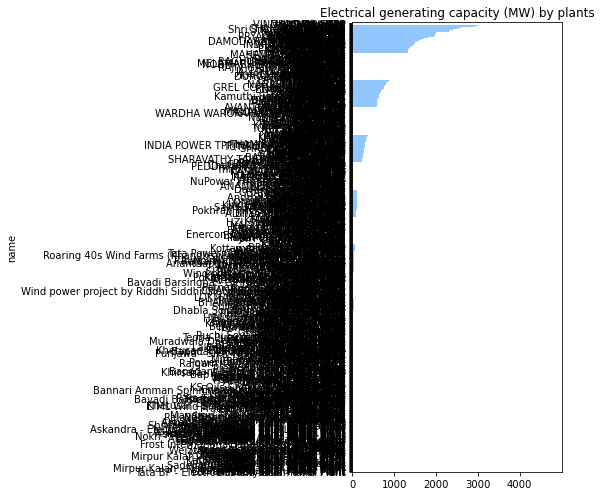

In [15]:
plt.figure(figsize=(8,7))
plt.title("Electrical generating capacity (MW) by plants")
data.groupby("name").mean()["capacity_mw"].sort_values().plot(kind="barh")
plt.tight_layout()

estimated_generation_gwh

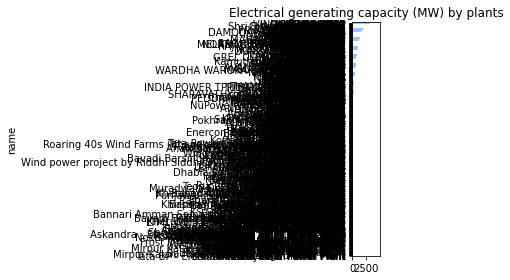

In [17]:
ax = plt.subplot(1,2,2)
plt.title("Electrical generating capacity (MW) by plants")
data.groupby(["name"]).mean()["capacity_mw"].sort_values().plot(kind="barh",ax=ax)
plt.tight_layout()

<AxesSubplot:title={'center':'Estimated annual electricity generation in gigawatt-hours'}, ylabel='name'>

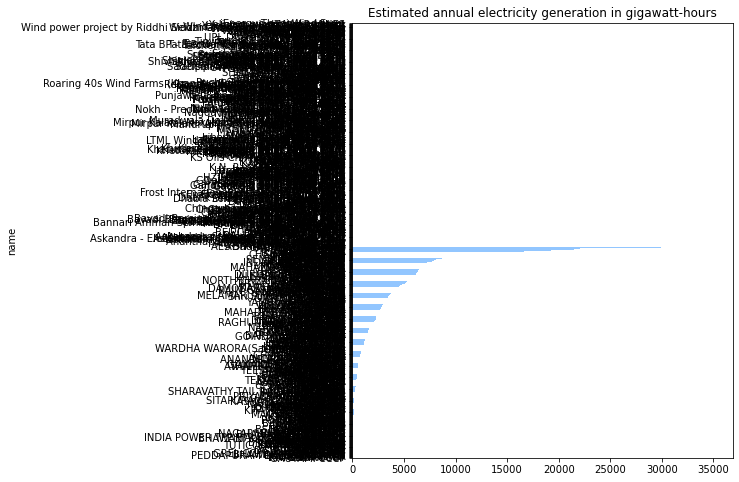

In [19]:
plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1)
plt.title("Estimated annual electricity generation in gigawatt-hours")
data.groupby(["name"]).mean()["generation_gwh_2017"].sort_values().plot(kind="barh",ax=ax)



<AxesSubplot:title={'center':'Estimated annual electricity generation in gigawatt-hours'}, ylabel='name'>

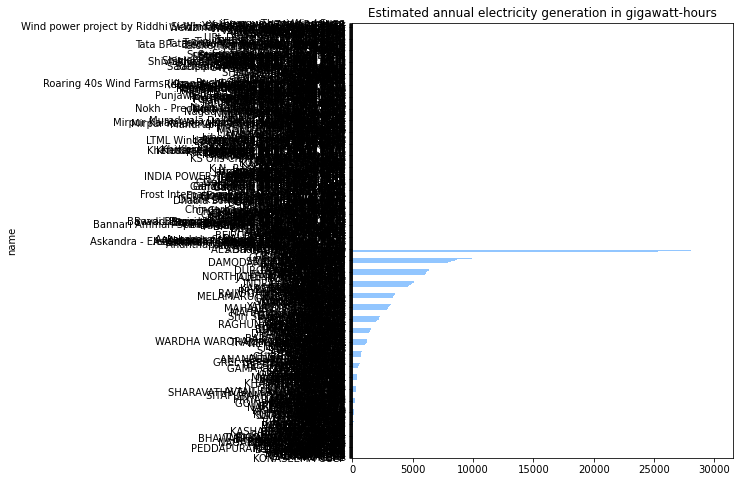

In [21]:
plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1)
plt.title("Estimated annual electricity generation in gigawatt-hours")
data.groupby(["name"]).mean()["generation_gwh_2016"].sort_values().plot(kind="barh",ax=ax)

<AxesSubplot:title={'center':'Estimated annual electricity generation in gigawatt-hours'}, ylabel='name'>

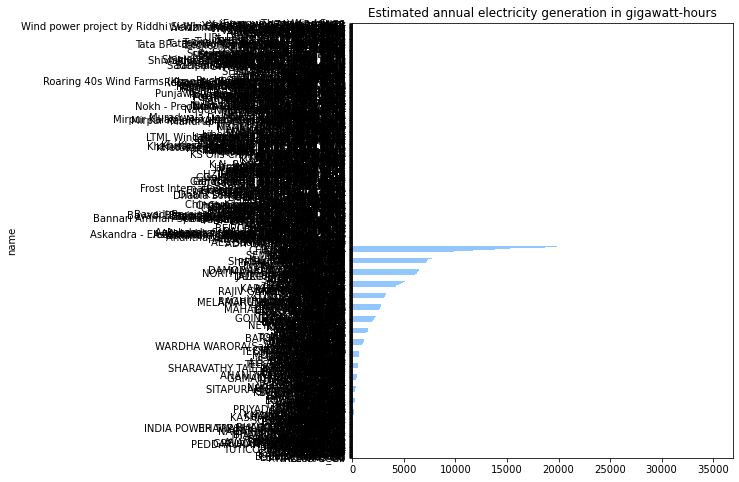

In [22]:
plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1)
plt.title("Estimated annual electricity generation in gigawatt-hours")
data.groupby(["name"]).mean()["generation_gwh_2018"].sort_values().plot(kind="barh",ax=ax)

Primay fuel

Text(0.5, 1.0, 'Power Plants based on primary Fuel')

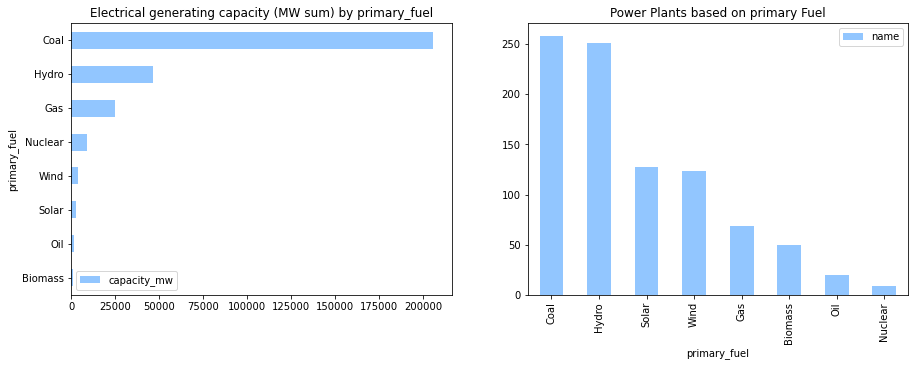

In [26]:
plt.figure(figsize=(15,5))
ax = plt.subplot(1,2,1)
data.groupby(["primary_fuel"])[["capacity_mw"]].sum().sort_values(by="capacity_mw").plot(kind="barh",ax=ax);
plt.title("Electrical generating capacity (MW sum) by primary_fuel");

ax = plt.subplot(1,2,2)
data.groupby(["primary_fuel"])[["name"]].count().sort_values(by="name", ascending=False).plot(kind="bar",ax=ax);
plt.title("Power Plants based on primary Fuel")

gppd_idnr

In [27]:
data.shape[0] == data["gppd_idnr"].unique().shape[0]

True

Commissioning_year

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

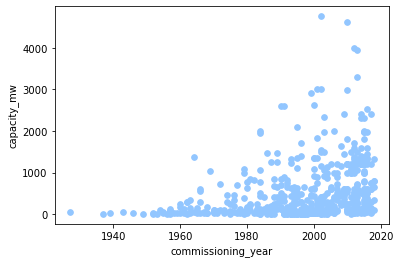

In [29]:
data[["commissioning_year","capacity_mw"]].sort_values(by="commissioning_year").plot(kind="scatter",x="commissioning_year",y="capacity_mw",s=32)

stakeholder

In [31]:
print(data["owner"].unique())
data.groupby("owner").count()["name"].sort_values()

['Solar Paces' 'Ultratech Cement ltd' 'AES' nan 'Hindustan Pvt lt'
 'Dr Ssk ltd' 'Ashok Ssk ltd' 'Shree Sugars ltd'
 'Ener-t International Ltd.' 'Nav Bharat Buildcon Private Limited'
 'MEIL Green Power Limited' 'Madras Cement Limited'
 'DDE Renewable Energy Private Limited (DREPL)'
 'Electromech Maritech Private Limited'
 'Finehope Allied Engineering Private Limited'
 'Khaya Solar Projects Private Limited' 'Newton Solar Private Limited'
 'Saidham Overseas Private Limited' 'Vasavi Solar Power Private Limited'
 'Indian Power ltd' 'Ballarpur Industries ltd' 'Jk Cement ltd'
 'India Ltd icl)' 'Bharat Petroleum Corporation Limited'
 'Bhilwara Energy Limited' 'Ideal Projects ltd' 'Ugar Works ltd'
 'Vishwanath Sugars ltd' 'Hothur Pvt ltd' 'Janki Corp ltd'
 'Mysore Mills ltd' 'Sunflag Co ltd' 'Varam Pvt ltd' 'Sangam Spinners ltd'
 'Bharat Refinery ltd' 'Binani Industries ltd' 'Indo Synthetics ltd'
 'Dr Babasaheb Ambedkar SSK Limited' 'AEW Infratech Private Limited'
 'Enercon India Ltd.' 'Green 

owner
ACME Cleantech Solutions Private Limited                 1
Northern Solaire Prakash Private Limited                 1
Northwest Energy Private Limited (NWEPL)                 1
NuPower                                                  1
Nuziveedu Seeds limited                                  1
                                                        ..
Maharashtra State Power Generation Co Ltd (MAHAGENCO)    3
Government of India                                      3
Jk Cement ltd                                            4
Acc Acc ltd                                              4
Sterling Agro Industries ltd.                            4
Name: name, Length: 280, dtype: int64

Estimated generation sum (GWH) by owner
owner
ACME Cleantech Solutions Private Limited          0.0
ACME Solar Energy                                 0.0
AES                                               0.0
AEW Infratech Private Limited                     0.0
Abellon CleanEnergy Limited                       0.0
                                                 ... 
West Coast Paper Mills Ltd.                       0.0
Yashwantrao Krishna ssk                           0.0
Ym Ssk ltd                                        0.0
Zamil New Delhi Infrastructure Private Limited    0.0
iEnergy Wind Farms                                0.0
Name: generation_gwh_2016, Length: 280, dtype: float64


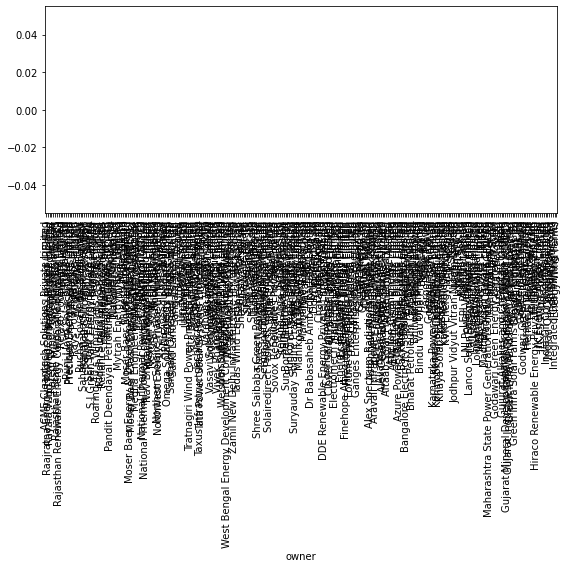

In [41]:
plt.figure(figsize=(8,8))
data.groupby("owner").sum()["generation_gwh_2016"].sort_values(ascending=False).plot(kind="bar")
plt.tight_layout()

print("Estimated generation sum (GWH) by owner")
print(data.groupby("owner").sum()["generation_gwh_2016"]/data["generation_gwh_2016"].sum())

Estimated generation sum (GWH) by owner
owner
ACME Cleantech Solutions Private Limited          0.0
ACME Solar Energy                                 0.0
AES                                               0.0
AEW Infratech Private Limited                     0.0
Abellon CleanEnergy Limited                       0.0
                                                 ... 
West Coast Paper Mills Ltd.                       0.0
Yashwantrao Krishna ssk                           0.0
Ym Ssk ltd                                        0.0
Zamil New Delhi Infrastructure Private Limited    0.0
iEnergy Wind Farms                                0.0
Name: generation_gwh_2017, Length: 280, dtype: float64


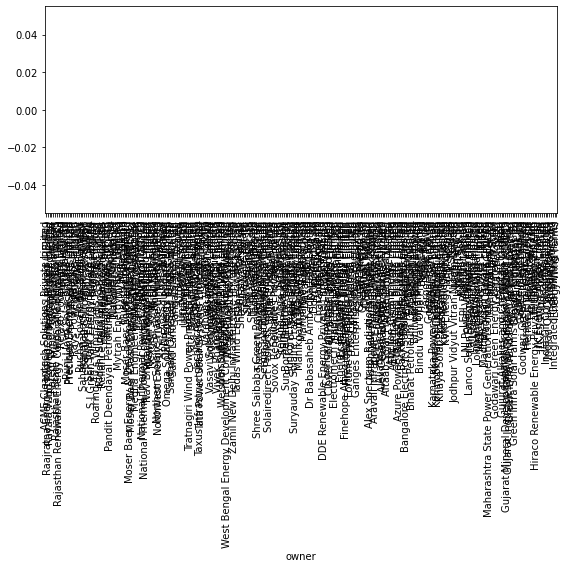

In [42]:
plt.figure(figsize=(8,8))
data.groupby("owner").sum()["generation_gwh_2017"].sort_values(ascending=False).plot(kind="bar")
plt.tight_layout()

print("Estimated generation sum (GWH) by owner")
print(data.groupby("owner").sum()["generation_gwh_2017"]/data["generation_gwh_2017"].sum())

Estimated generation sum (GWH) by owner
owner
ACME Cleantech Solutions Private Limited          0.0
ACME Solar Energy                                 0.0
AES                                               0.0
AEW Infratech Private Limited                     0.0
Abellon CleanEnergy Limited                       0.0
                                                 ... 
West Coast Paper Mills Ltd.                       0.0
Yashwantrao Krishna ssk                           0.0
Ym Ssk ltd                                        0.0
Zamil New Delhi Infrastructure Private Limited    0.0
iEnergy Wind Farms                                0.0
Name: generation_gwh_2018, Length: 280, dtype: float64


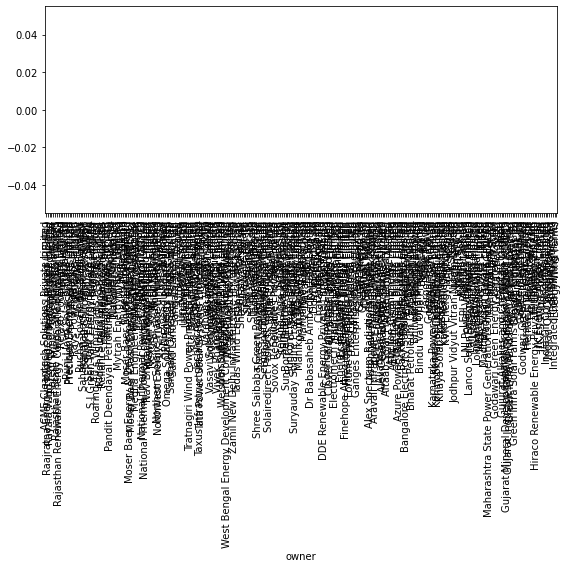

In [43]:
plt.figure(figsize=(8,8))
data.groupby("owner").sum()["generation_gwh_2018"].sort_values(ascending=False).plot(kind="bar")
plt.tight_layout()

print("Estimated generation sum (GWH) by owner")
print(data.groupby("owner").sum()["generation_gwh_2018"]/data["generation_gwh_2018"].sum())